In [91]:
import nltk
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.core.display import HTML
import matplotlib.pyplot as plt


In [92]:
keywords = ["machine tool",
"metal cutting",
"manufacturing",
"additive manufacturing",
"3d printing",
"metal forming",
"robot",
"aluminium",
"aluminum",
"alloy",
"titanium",
"titanium alloy"]
stopwords = nltk.corpus.stopwords.words('english')

In [93]:
def freq(word, tokens):
    return tokens.count(word)

def word_count(tokens):
    return len(tokens)

def tf(word, tokens):
    return (freq(word, tokens) / float(word_count(tokens)))

def getFreqByDoc(doc):
    #get tokens
    tokens = nltk.word_tokenize(str(doc[1]) + ' ' + str(doc[2]))
    
    #get bitokens
    bi_tokens =  nltk.bigrams(tokens)
    bi_tokens = [' '.join(token).lower() for token in bi_tokens]
    bi_tokens = [token for token in bi_tokens if token not in stopwords]

    tokens = [token.lower() for token in tokens if len(token) > 2]
    tokens = [token for token in tokens if token not in stopwords]

    #merge tokens and bi
    alltokens = []
    alltokens.extend(tokens)
    alltokens.extend(bi_tokens)

    olist = []
    for word in (keywords):
        f = freq(word, alltokens)
        ilist = [doc[0], word, f, doc[3], doc[5]]
        olist.append(ilist)
    df = pd.DataFrame(olist, columns=['doc','word', 'frequency', 'source', 'sample_type'])
    return df

def createFreqDf(sdf):
    #pass a sample df
    #make a list so that it can be iterated
    mfgDfSampleList = sdf.as_matrix().tolist()
    mfgFreqDfList = []
    for mfg in mfgDfSampleList:
        df = getFreqByDoc(mfg)
        mfgFreqDfList.append(df)

    mfgFreqDf = pd.concat(mfgFreqDfList)
    return mfgFreqDf

In [94]:
#reading the abstracts in to a DF
mfgDf = pd.DataFrame.from_csv('../../data/positive_data.csv', index_col=None)
nsfDf = pd.DataFrame.from_csv('../../data/negative_data.csv', index_col=None)

In [95]:
#draw samples
mfgDfSample = mfgDf.sample(3000)
mfgDfSample["sample_type"] = "MFG"

nsfDfSample = nsfDf.sample(3000)
nsfDfSample["sample_type"] = "NON-MFG"

In [96]:
mfgDfSample.head()

,id,title,abstract,event_name,event_year,sample_type
2685,NSF_20150101_1550055,EAGER: Collaborative Research: Designing Digit...,One of the best ways to engage people in Scien...,NSF,2015.0,MFG
2191,NSF_20140101_1453527,CAREER: De Novo Assembly of Large Genomic Data,Sequencing is an experimental wet-lab techniqu...,NSF,2014.0,MFG
2825,NSF_20150101_1559544,RAPID: The Response-Recovery Transition Phase ...,Following a major disaster such as the Nepal e...,NSF,2015.0,MFG
1570,NSF_20140101_1418504,SCH: INT: Collaborative Research: High-through...,As the adoption of electronic health records (...,NSF,2014.0,MFG
4463,CIRP_20140101_23-1251,Design and management of manufacturing systems...,Manufacturing companies are continuously facin...,CIRP,2014.0,MFG


In [97]:
mfgf = createFreqDf(mfgDfSample)
#print(mfgf)
nsff = createFreqDf(nsfDfSample)
#print(nsfgf)    
#mfgf.head()

Keyword Frequency Mfg


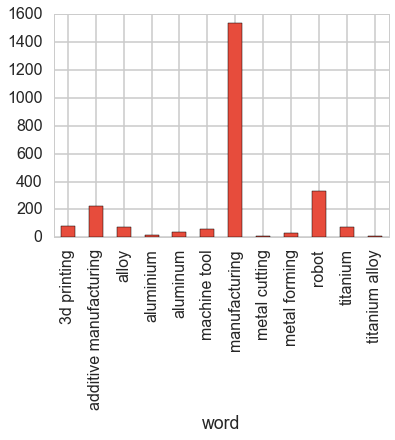

In [98]:
print('Keyword Frequency Mfg')
mfgf.groupby(['word'])['frequency'].sum().plot(kind='bar')

Keyword Frequency Non-Mfg


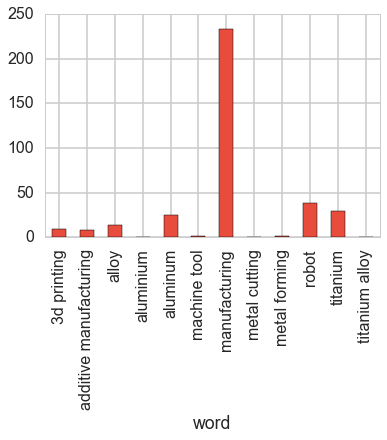

In [99]:
print('Keyword Frequency Non-Mfg')
nsff.groupby(['word'])['frequency'].sum().plot(kind='bar')

In [100]:
aDf = pd.concat([mfgf, nsff])
#aDf.head() 

In [101]:
nsff.head()

,doc,word,frequency,source,sample_type
0,NSF_20140101_1447854,machine tool,0,NSF,NON-MFG
1,NSF_20140101_1447854,metal cutting,0,NSF,NON-MFG
2,NSF_20140101_1447854,manufacturing,0,NSF,NON-MFG
3,NSF_20140101_1447854,additive manufacturing,0,NSF,NON-MFG
4,NSF_20140101_1447854,3d printing,0,NSF,NON-MFG


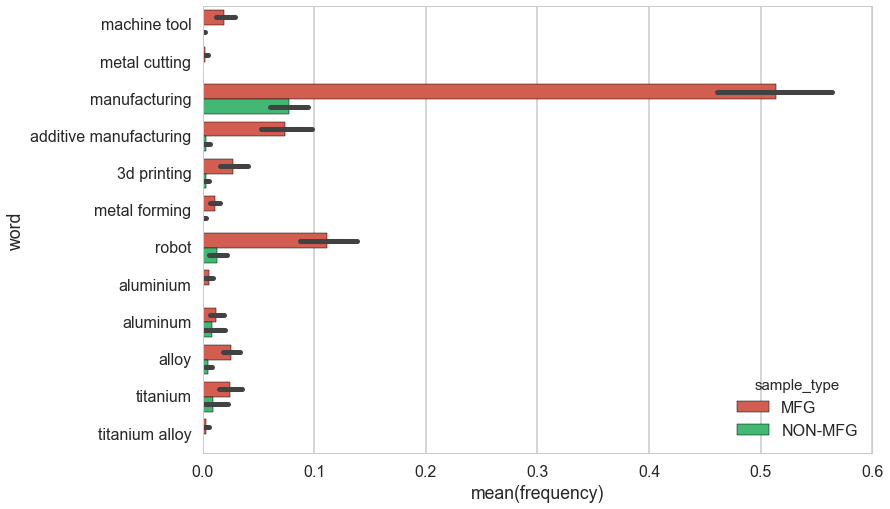

In [102]:
sns.set_style("whitegrid")
sns.set_palette(["#e74c3c", "#2ecc71"])
sns.set_context("poster")
plt.figure(figsize=(12, 8))
sns.barplot(x="frequency", y="word", hue="sample_type", data=aDf)


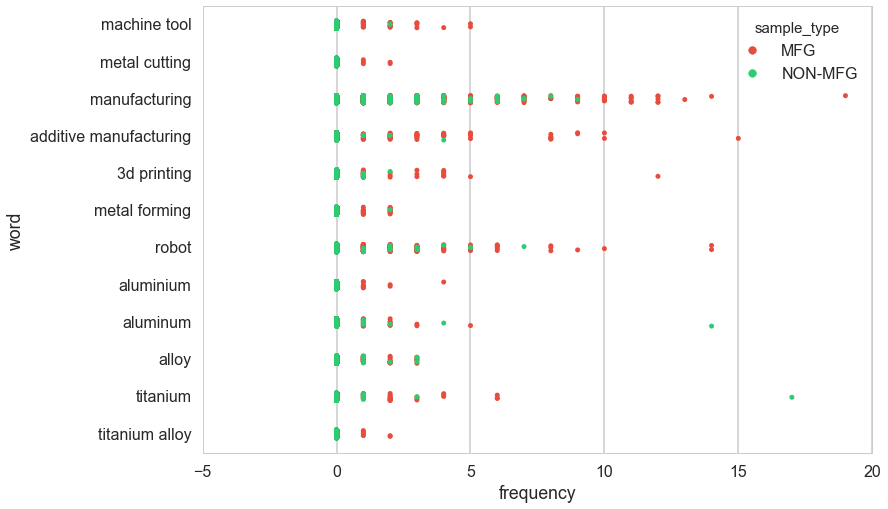

In [103]:
sns.set_context("poster")
plt.figure(figsize=(12, 8))
sns.stripplot(y="word", x="frequency", hue="sample_type", data=aDf, jitter=True);